In [67]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [68]:
path = '/home/featurize/data/69-Site_17-Sanyo.csv'
df = pd.read_csv(path)
print(df)

                   timestamp  Active_Energy_Delivered_Received  \
0        2010-03-11 00:00:00                             280.0   
1        2010-03-11 00:05:00                             280.0   
2        2010-03-11 00:10:00                             280.0   
3        2010-03-11 00:15:00                             280.0   
4        2010-03-11 00:20:00                             280.0   
...                      ...                               ...   
1160915  2021-04-17 12:40:00                          136876.0   
1160916  2021-04-17 12:45:00                               NaN   
1160917  2021-04-17 12:50:00                          136877.0   
1160918  2021-04-17 12:55:00                          136877.0   
1160919  2021-04-17 13:00:00                          136878.0   

         Current_Phase_Average  Active_Power  Performance_Ratio  Wind_Speed  \
0                     0.000000      0.000000                NaN    4.520275   
1                     0.000000      0.000000     

/tmp/ipykernel_18374/763300534.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method='pearson')


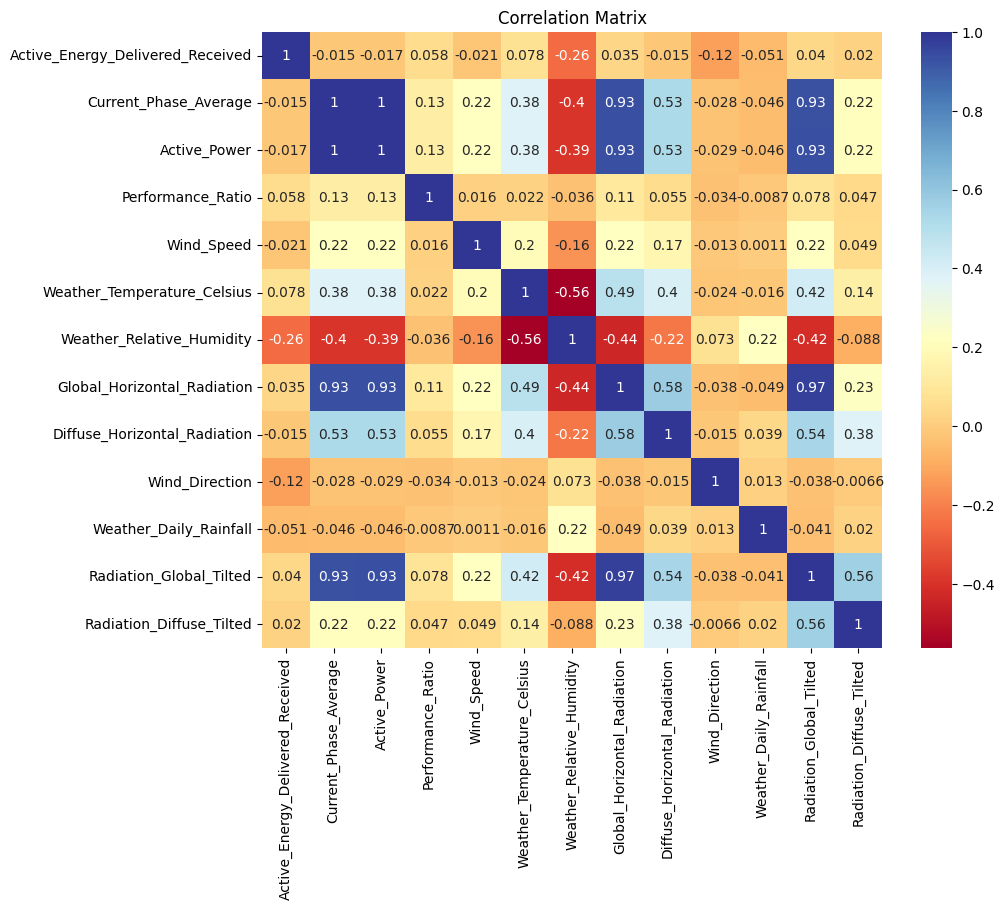

In [69]:
correlation_matrix = df.corr(method='pearson')

# 绘制相关性矩阵图
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu')
plt.title('Correlation Matrix')
plt.show()

In [70]:
# 将时间戳转换为Datetime类型
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 以年为单位进行分组，并计算每个组中的行数
yearly_data_count = df.groupby(df['timestamp'].dt.year).size()

print(yearly_data_count)

timestamp
2010     85248
2011    104901
2012    105394
2013    105076
2014    105111
2015    105120
2016    105408
2017    104614
2018    105120
2019    102905
2020    105382
2021     26641
dtype: int64


In [71]:
# 将 timestamp 列转换为日期时间格式
df['timestamp'] = pd.to_datetime(df['timestamp'])

# 提取2015年的数据
data_2015 = df[df['timestamp'].dt.year == 2015]

# 选择所需的列
selected_columns = ['timestamp', 'Active_Power', 'Global_Horizontal_Radiation','Weather_Temperature_Celsius']
data_selected = data_2015[selected_columns]
data=data_selected
print(data_selected)

                 timestamp  Active_Power  Global_Horizontal_Radiation  \
505730 2015-01-01 00:00:00           0.0                     1.905465   
505731 2015-01-01 00:05:00           0.0                     2.072065   
505732 2015-01-01 00:10:00           0.0                     2.422190   
505733 2015-01-01 00:15:00           0.0                     2.749008   
505734 2015-01-01 00:20:00           0.0                     2.837952   
...                    ...           ...                          ...   
610845 2015-12-31 23:35:00           0.0                     2.253799   
610846 2015-12-31 23:40:00           0.0                     2.305342   
610847 2015-12-31 23:45:00           0.0                     2.319084   
610848 2015-12-31 23:50:00           0.0                     2.309862   
610849 2015-12-31 23:55:00           0.0                     2.451491   

        Weather_Temperature_Celsius  
505730                    24.352026  
505731                    24.431965  
505732   

In [8]:
# 将 timestamp 列转换为日期时间格式
data.loc[:, 'timestamp'] = pd.to_datetime(data['timestamp'])

# 提取日期中的小时部分
data.loc[:, 'hour'] = data['timestamp'].dt.hour

# 筛选出每天的7点到19点的数据
data_selected = data.loc[(data['hour'] >= 7) & (data['hour'] <= 18)]

# 选择所需的列
selected_columns = ['timestamp', 'Active_Power', 'Global_Horizontal_Radiation','Weather_Temperature_Celsius']
data_final = data_selected[selected_columns]

data_final=data_final.reset_index(drop=True)

print(data_final)

                timestamp  Active_Power  Global_Horizontal_Radiation  \
0     2015-01-01 07:00:00      0.335130                   193.750397   
1     2015-01-01 07:05:00      0.474730                   218.105728   
2     2015-01-01 07:10:00      0.577070                   242.153000   
3     2015-01-01 07:15:00      0.679130                   265.285797   
4     2015-01-01 07:20:00      0.790930                   288.995758   
...                   ...           ...                          ...   
52555 2015-12-31 18:35:00      0.115867                    32.895176   
52556 2015-12-31 18:40:00      0.108867                    29.026871   
52557 2015-12-31 18:45:00      0.069233                    20.862143   
52558 2015-12-31 18:50:00      0.053800                    17.677027   
52559 2015-12-31 18:55:00      0.042000                    15.592741   

       Weather_Temperature_Celsius  
0                        27.866468  
1                        28.472389  
2                       

/tmp/ipykernel_18374/3975607415.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[:, 'timestamp'] = pd.to_datetime(data['timestamp'])
/tmp/ipykernel_18374/3975607415.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  data.loc[:, 'timestamp'] = pd.to_datetime(data['timestamp'])
/tmp/ipykernel_18374/3975607415.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

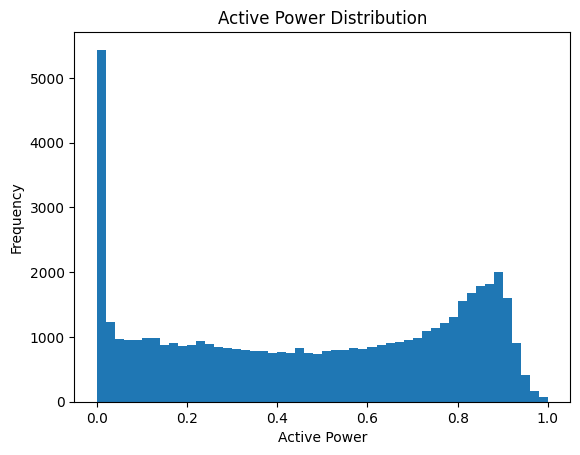

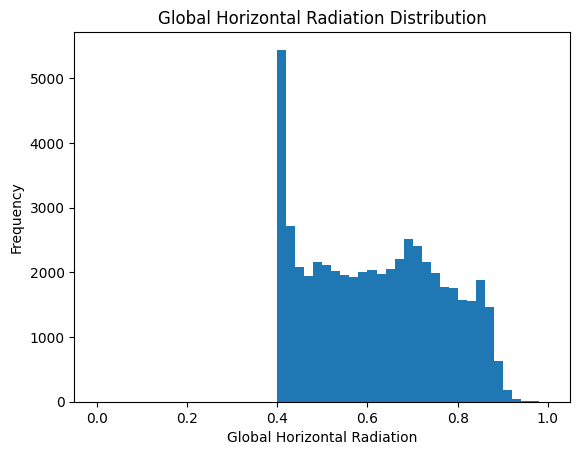

In [72]:
# 绘制Active Power的直方图
plt.hist(data_final['Active_Power'], bins=50)
plt.title('Active Power Distribution')
plt.xlabel('Active Power')
plt.ylabel('Frequency')
plt.show()

# 绘制Global Horizontal Radiation的直方图
plt.hist(data_final['Global_Horizontal_Radiation'], bins=50)
plt.title('Global Horizontal Radiation Distribution')
plt.xlabel('Global Horizontal Radiation')
plt.ylabel('Frequency')
plt.show()


In [73]:
# 将timestamp列转换为日期格式
data_final['timestamp'] = pd.to_datetime(data_final['timestamp'])

# 提取日期信息
data_final['date'] = data_final['timestamp'].dt.date

# 统计每天的样本个数
sample_count = data_final['date'].value_counts()

# 打印不等于144的天数
abnormal_days = sample_count[sample_count != 144]

data_final = data_final.drop('date', axis=1)

print(abnormal_days)

Series([], Name: date, dtype: int64)


In [74]:
# data_final.to_csv('D:\Desktop\LSTM\data\data_2015.csv', index=False)

In [75]:
import sys
import math
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import tensorflow.keras.backend as K
from tensorflow.keras.callbacks import TensorBoard
import time
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import load_model
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [76]:
data = data_final

# 创建MinMaxScaler对象
scaler = MinMaxScaler()

# 选择需要正则化的列
columns_to_normalize = ['Active_Power', 'Global_Horizontal_Radiation','Weather_Temperature_Celsius']

# 对选定的列进行归一化处理
data[columns_to_normalize] = scaler.fit_transform(data[columns_to_normalize])

max_values = scaler.data_max_
min_values = scaler.data_min_
print(data)

                timestamp  Active_Power  Global_Horizontal_Radiation  \
0     2015-01-01 07:00:00      0.055203                     0.484418   
1     2015-01-01 07:05:00      0.078171                     0.494421   
2     2015-01-01 07:10:00      0.095008                     0.504297   
3     2015-01-01 07:15:00      0.111800                     0.513798   
4     2015-01-01 07:20:00      0.130194                     0.523537   
...                   ...           ...                          ...   
52555 2015-12-31 18:35:00      0.019129                     0.418351   
52556 2015-12-31 18:40:00      0.017977                     0.416763   
52557 2015-12-31 18:45:00      0.011456                     0.413409   
52558 2015-12-31 18:50:00      0.008917                     0.412101   
52559 2015-12-31 18:55:00      0.006976                     0.411245   

       Weather_Temperature_Celsius  day   min  
0                         0.688220    1   420  
1                         0.700604    1

In [77]:
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    data['day'] = data['timestamp'].dt.dayofyear
    data['min'] = data['timestamp'].dt.hour * 60 + data['timestamp'].dt.minute
    # data = data.drop('timestamp',axis=1)
    data = data.reset_index(drop = True)
    print(data)

                timestamp  Active_Power  Global_Horizontal_Radiation  \
0     2015-01-01 07:00:00      0.055203                     0.484418   
1     2015-01-01 07:05:00      0.078171                     0.494421   
2     2015-01-01 07:10:00      0.095008                     0.504297   
3     2015-01-01 07:15:00      0.111800                     0.513798   
4     2015-01-01 07:20:00      0.130194                     0.523537   
...                   ...           ...                          ...   
52555 2015-12-31 18:35:00      0.019129                     0.418351   
52556 2015-12-31 18:40:00      0.017977                     0.416763   
52557 2015-12-31 18:45:00      0.011456                     0.413409   
52558 2015-12-31 18:50:00      0.008917                     0.412101   
52559 2015-12-31 18:55:00      0.006976                     0.411245   

       Weather_Temperature_Celsius  day   min  
0                         0.688220    1   420  
1                         0.700604    1

In [78]:
 # 提取出1月到11月30日的数据作为训练集
train_data = data[(data['timestamp'].dt.month >= 1) & (data['timestamp'].dt.day <= 30) & (data['timestamp'].dt.year == 2015)]

# 提取出12月1日到15日的数据作为测试集
test_data = data[(data['timestamp'].dt.month == 12) & (data['timestamp'].dt.day >= 1) & (data['timestamp'].dt.day <= 15) & (data['timestamp'].dt.year == 2015)]

# 提取出12月15日到31日的数据作为验证集
validation_data = data[(data['timestamp'].dt.month == 12) & (data['timestamp'].dt.day >= 15) & (data['timestamp'].dt.year == 2015)]

train_data = train_data.reset_index(drop=True)
test_data = test_data.reset_index(drop=True)
validation_data = validation_data.reset_index(drop=True)

print(train_data,test_data,validation_data)

                timestamp  Active_Power  Global_Horizontal_Radiation  \
0     2015-01-01 07:00:00      0.055203                     0.484418   
1     2015-01-01 07:05:00      0.078171                     0.494421   
2     2015-01-01 07:10:00      0.095008                     0.504297   
3     2015-01-01 07:15:00      0.111800                     0.513798   
4     2015-01-01 07:20:00      0.130194                     0.523537   
...                   ...           ...                          ...   
51547 2015-12-30 18:35:00      0.002918                     0.409276   
51548 2015-12-30 18:40:00      0.000905                     0.408177   
51549 2015-12-30 18:45:00      0.000066                     0.407149   
51550 2015-12-30 18:50:00      0.000066                     0.407806   
51551 2015-12-30 18:55:00      0.000066                     0.407512   

       Weather_Temperature_Celsius  day   min  
0                         0.688220    1   420  
1                         0.700604    1

In [79]:
print(train_data.shape)

(51552, 6)


In [80]:
def create_dataset(dataset, look_back=144):
    dataX, dataY = [], []
    for i in range(dataset.shape[0] - look_back - 144):
        a = dataset[i:(i + look_back),[3,4,5,1,2]]
        dataX.append(a)
        dataY.append(dataset[i + look_back:i + look_back + 144, 1])
    return np.array(dataX), np.array(dataY)


trainX, trainY = create_dataset(train_data.to_numpy())  # 单步预测
testX, testY = create_dataset(test_data.to_numpy())
print(trainX.shape,trainY.shape)
print(testX.shape,testY.shape)

(51264, 144, 5) (51264, 144)
(1872, 144, 5) (1872, 144)


In [109]:
model = Sequential()
model.add(LSTM(8, input_shape=(144, 5), return_sequences=True))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')

In [110]:
trainX = trainX.astype(np.float32)
trainY = trainY.astype(np.float32)

In [111]:
history = model.fit(trainX, trainY, epochs=10, batch_size=3, verbose=2)
loss = history.history['loss']

Epoch 1/10
17088/17088 - 110s - loss: 0.0974 - 110s/epoch - 6ms/step
Epoch 2/10
17088/17088 - 108s - loss: 0.0377 - 108s/epoch - 6ms/step
Epoch 3/10
17088/17088 - 108s - loss: 0.0327 - 108s/epoch - 6ms/step
Epoch 4/10
17088/17088 - 109s - loss: 0.0311 - 109s/epoch - 6ms/step
Epoch 5/10
17088/17088 - 110s - loss: 0.0302 - 110s/epoch - 6ms/step
Epoch 6/10
17088/17088 - 109s - loss: 0.0298 - 109s/epoch - 6ms/step
Epoch 7/10
17088/17088 - 106s - loss: 0.0296 - 106s/epoch - 6ms/step
Epoch 8/10
17088/17088 - 106s - loss: 0.0295 - 106s/epoch - 6ms/step
Epoch 9/10
17088/17088 - 110s - loss: 0.0293 - 110s/epoch - 6ms/step
Epoch 10/10
17088/17088 - 111s - loss: 0.0292 - 111s/epoch - 7ms/step


In [112]:
model.save('/home/featurize/work/Model/model_dim5_epochs10_Memory8_MSE.h5')

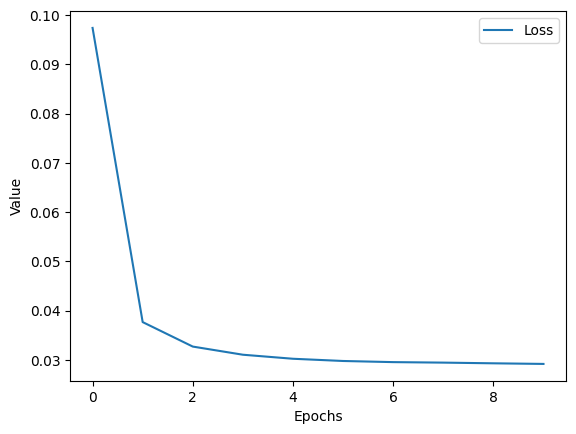

In [113]:
# 创建 x 轴坐标，可以是训练轮数、时间等
x = range(len(loss))

# 绘制损失值和准确率的曲线
plt.plot(x, loss, label='Loss')
# plt.plot(x, accuracy, label='Accuracy')

# 添加图例和标签
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Value')
# 显示图形
plt.show()

In [114]:
trainX = trainX.astype(np.float32)
trainY = trainY.astype(np.float32)
testX = testX.astype(np.float32)
testY = testY.astype(np.float32)

In [115]:
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)
print(trainPredict.shape)
print(testPredict.shape)

59/59 [==============================] - 1s 4ms/step
(51264, 144, 1)
(1872, 144, 1)


In [116]:
testPredict = testPredict.reshape(testPredict.shape[0], testPredict.shape[1])
testPredict = testPredict * (max_values[0] - min_values[0]) + min_values[0]
testY = testY * (max_values[0] - min_values[0]) + min_values[0]

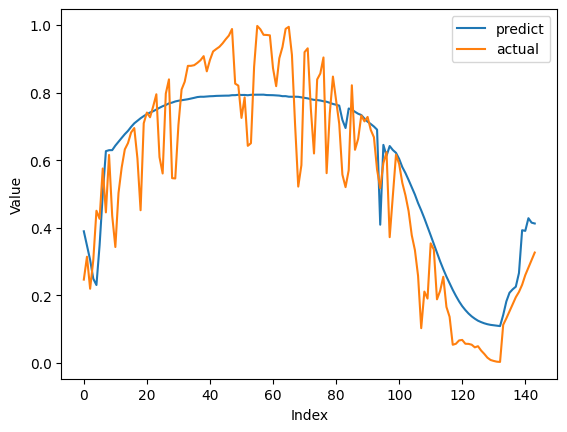

In [122]:
x= np.arange(testY[0,:].shape[0])
# 绘制预测值和实际值的折线图
date=11
plt.plot(x, testPredict[date, :], label='predict',)
plt.plot(x, testY[date,:], label='actual')

# 添加图例和标签
plt.legend()
plt.xlabel('Index')
plt.ylabel('Value')
# 显示图形
# plt.show()
plt.savefig('plot.png')

RMES 0.20299624
MAE 0.15334177
R2 0.4930557466593268
平均相对误差: 0.32245255


Text(0, 0.5, 'Frequency')

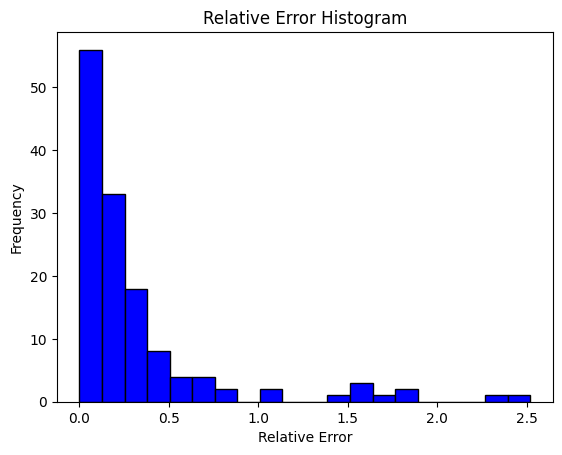

In [120]:

mse = mean_squared_error(testY, testPredict)
rmse = np.sqrt(mse)
print("RMES",rmse)

mae = mean_absolute_error(testY, testPredict)
print("MAE",mae)

r2 = r2_score(testY, testPredict)
print("R2",r2)

def calculate_relative_error(predictions, targets, threshold=3):
    # 计算相对误差
    relative_errors = np.abs((predictions - targets) / targets)

    # 找到异常值的索引
    outlier_indices = np.where(relative_errors > threshold)

    # 剔除异常值
    cleaned_errors = np.delete(relative_errors, outlier_indices)

    # 计算平均相对误差
    average_error = np.mean(cleaned_errors)

    return average_error,cleaned_errors

average_error ,errors= calculate_relative_error(testPredict[20], testY[20])
print("平均相对误差:", average_error)

plt.hist(errors, bins=20, color='blue', edgecolor='black')

# 设置标题和坐标轴标签
plt.title('Relative Error Histogram')
plt.xlabel('Relative Error')
plt.ylabel('Frequency')
